# Case Study 2: Credit Scoring

** The raw dataset contains 4446 rows and 14 columns:**
1. Status: credit status
2. Seniority: job seniority (years)
3. Home: type of home ownership
4. Time: time of requested loan
5. Age: client's age
6. Marital: marital status
7. Records: existance of records
8. Job: type of job
9. Expenses: amount of expenses
10. Income: amount of income
11. Assets: amount of assets
12. Debt: amount of debt
13. Amount: amount requested of loan
14. Price: price of good

** The dataset is available at https://github.com/gastonstat/CreditScoring/blob/master/CleanCreditScoring.csv **

In [36]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

# Get the Data

In [37]:
df = pd.read_csv('02 scoring.csv',sep=',')
df['SavingRate'] = (df['Income'] - df['Expenses']) / df['Income']
df['FinRate'] = df['Amount'] / df['Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 16 columns):
Status        4446 non-null object
Seniority     4446 non-null int64
Home          4446 non-null object
Time          4446 non-null int64
Age           4446 non-null int64
Marital       4446 non-null object
Records       4446 non-null object
Job           4446 non-null object
Expenses      4446 non-null int64
Income        4446 non-null int64
Assets        4446 non-null int64
Debt          4446 non-null int64
Amount        4446 non-null int64
Price         4446 non-null int64
SavingRate    4446 non-null float64
FinRate       4446 non-null float64
dtypes: float64(2), int64(9), object(5)
memory usage: 555.8+ KB


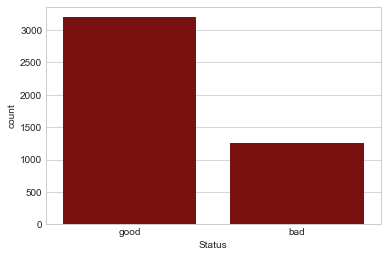

In [38]:
sns.countplot(df['Status'],color="darkred")

# Feature Engineering

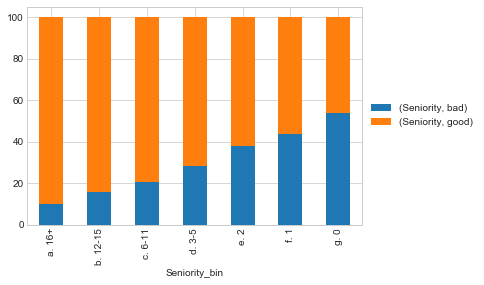

In [39]:
#Seniority_bin
def bin_x (x): 
    if x == 0: return "g. 0"
    elif x == 1: return "f. 1"
    elif x == 2: return "e. 2"
    elif x <= 5: return "d. 3-5"
    elif x <= 11: return "c. 6-11"
    elif x <= 15: return "b. 12-15"
    else: return "a. 16+"
df['Seniority_bin'] = df['Seniority'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Seniority'], index=['Seniority_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

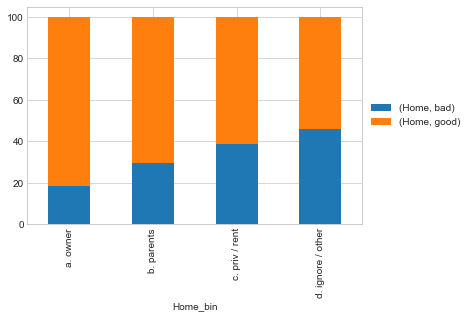

In [40]:
#Home_bin
def bin_x (x): 
    if x in ('ignore','other'): return "d. ignore / other"
    elif x in ('priv','rent'): return "c. priv / rent"
    elif x in ('parents'): return "b. parents"
    else: return "a. owner"
df['Home_bin'] = df['Home'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Home'], index=['Home_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

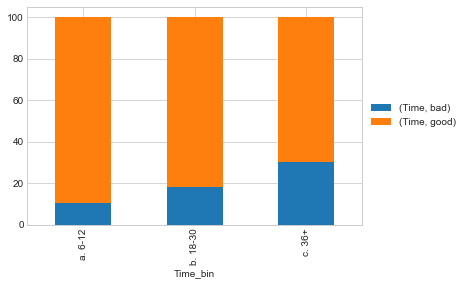

In [41]:
#Time_bin
def bin_x (x): 
    if x <= 12: return "a. 6-12"
    elif x <= 30: return "b. 18-30"
    else: return "c. 36+"
df['Time_bin'] = df['Time'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Time'], index=['Time_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

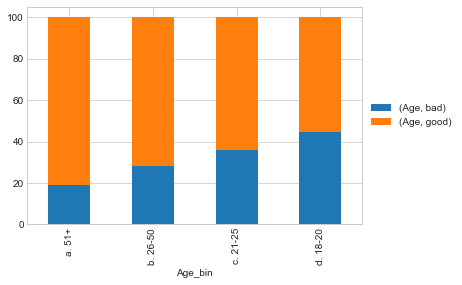

In [42]:
#Age_bin
def bin_x (x): 
    if x <= 20: return "d. 18-20"
    elif x <= 25: return "c. 21-25"
    elif x <= 50: return "b. 26-50"
    else: return "a. 51+"
df['Age_bin'] = df['Age'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Age'], index=['Age_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

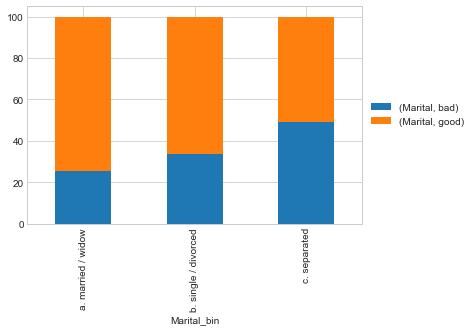

In [43]:
#Marital_bin
def bin_x (x): 
    if x in ('married','widow'): return "a. married / widow"
    elif x in ('single','divorced'): return "b. single / divorced"
    else: return "c. separated"
df['Marital_bin'] = df['Marital'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Marital'], index=['Marital_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

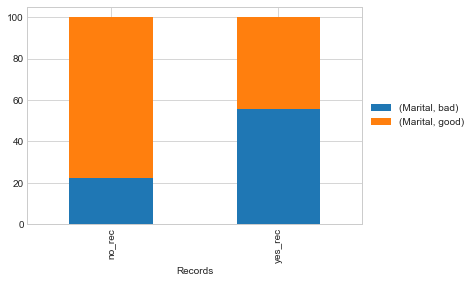

In [44]:
#Records
x_chart = df.pivot_table(values=['Marital'], index=['Records'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

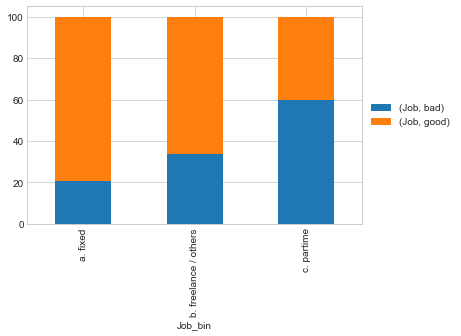

In [45]:
#Job_bin
def bin_x (x): 
    if x in ('fixed'): return "a. fixed"
    elif x in ('partime'): return "c. partime"
    else: return "b. freelance / others"
df['Job_bin'] = df['Job'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Job'], index=['Job_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

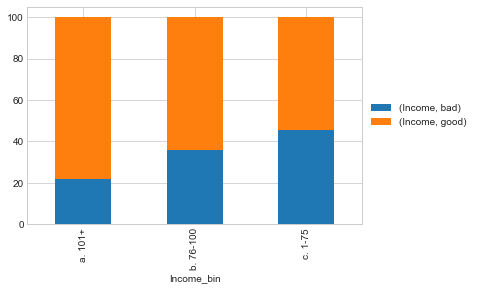

In [46]:
#Income_bin
def bin_x (x): 
    if x <= 75: return "c. 1-75"
    elif x <= 100: return "b. 76-100"
    else: return "a. 101+"
df['Income_bin'] = df['Income'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Income'], index=['Income_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

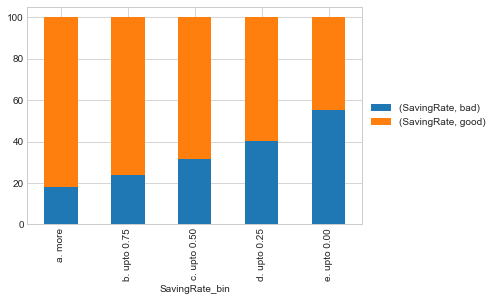

In [47]:
#SavingRate_bin
def bin_x (x): 
    if x <= 0: return "e. upto 0.00"
    elif x <= 0.25: return "d. upto 0.25"
    elif x <= 0.50: return "c. upto 0.50"
    elif x <= 0.75: return "b. upto 0.75"
    else: return "a. more"
df['SavingRate_bin'] = df['SavingRate'].apply(bin_x)
    
x_chart = df.pivot_table(values=['SavingRate'], index=['SavingRate_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

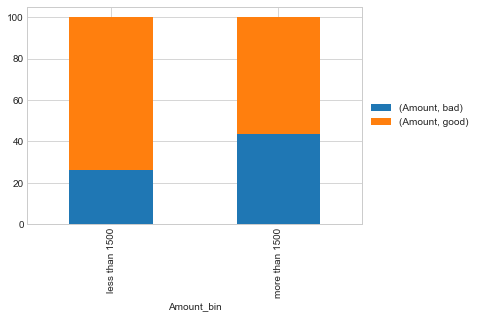

In [48]:
#Amount_bin
def bin_x (x): 
    if x <= 1500: return "less than 1500"
    else: return "more than 1500"
df['Amount_bin'] = df['Amount'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Amount'], index=['Amount_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

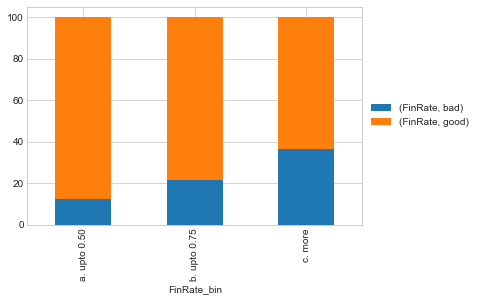

In [49]:
#FinRate_bin
def bin_x (x): 
    if x <= 0.50: return "a. upto 0.50"
    elif x <= 0.75: return "b. upto 0.75"
    else: return "c. more"
df['FinRate_bin'] = df['FinRate'].apply(bin_x)
    
x_chart = df.pivot_table(values=['FinRate'], index=['FinRate_bin'], columns=['Status'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# WOE and IV

* IV more than 0.5: Very Strong 
* IV between 0.5 and 0.3: Strong 
* IV between 0.3 and 0.1: Medium
* IV less than 0.1: Weak    

In [50]:
#Home_bin
y_chart = df.pivot_table(values=['Price'], index=['Home_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.243


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Home_bin,,,,,,,,
a. owner,390,1716,2106,0.312250,0.536753,0.185185,-0.541735,0.121621
b. parents,232,550,782,0.185749,0.172036,0.296675,0.076689,0.001052
c. priv / rent,472,747,1219,0.377902,0.233657,0.387203,0.480783,0.069351
d. ignore / other,155,184,339,0.124099,0.057554,0.457227,0.768359,0.051131


In [51]:
#Seniority_bin
y_chart = df.pivot_table(values=['Price'], index=['Seniority_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.519


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Seniority_bin,,,,,,,,
a. 16+,71,650,721,0.056845,0.203316,0.098474,-1.274423,0.186665
b. 12-15,78,419,497,0.062450,0.131060,0.156942,-0.741292,0.050860
c. 6-11,184,715,899,0.147318,0.223647,0.204672,-0.417477,0.031866
d. 3-5,235,598,833,0.188151,0.187050,0.282113,0.005864,0.000006
e. 2,172,282,454,0.137710,0.088208,0.378855,0.445457,0.022051
f. 1,222,288,510,0.177742,0.090084,0.435294,0.679587,0.059571
g. 0,287,245,532,0.229784,0.076634,0.539474,1.098094,0.168172


In [52]:
#Time_bin
y_chart = df.pivot_table(values=['Price'], index=['Time_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.082


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Time_bin,,,,,,,,
a. 6-12,19,161,180,0.015212,0.05036,0.105556,-1.197096,0.042075
b. 18-30,89,401,490,0.071257,0.12543,0.181633,-0.565455,0.030632
c. 36+,1141,2635,3776,0.913531,0.82421,0.302172,0.102892,0.009190


In [53]:
#Age_bin
y_chart = df.pivot_table(values=['Price'], index=['Age_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.065


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Age_bin,,,,,,,,
a. 51+,123,528,651,0.098479,0.165155,0.188940,-0.517042,0.034474
b. 26-50,868,2228,3096,0.694956,0.696903,0.280362,-0.002798,0.000005
c. 21-25,220,394,614,0.176141,0.123241,0.358306,0.357146,0.018893
d. 18-20,38,47,85,0.030424,0.014701,0.447059,0.727308,0.011436


In [54]:
#Marital_bin
y_chart = df.pivot_table(values=['Price'], index=['Marital_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.056


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Marital_bin,,,,,,,,
a. married / widow,845,2460,3305,0.676541,0.769471,0.255673,-0.128710,0.011961
b. single / divorced,340,671,1011,0.272218,0.209884,0.336301,0.260046,0.016210
c. separated,64,66,130,0.051241,0.020644,0.492308,0.909098,0.027815


In [55]:
#Records
y_chart = df.pivot_table(values=['Price'], index=['Records'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.341


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Records,,,,,,,,
no_rec,823,2854,3677,0.658927,0.892712,0.223824,-0.303651,0.070989
yes_rec,426,343,769,0.341073,0.107288,0.553966,1.156579,0.270390


In [56]:
#Job_bin
y_chart = df.pivot_table(values=['Price'], index=['Job_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.325


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Job_bin,,,,,,,,
a. fixed,580,2223,2803,0.464371,0.695339,0.206921,-0.403715,0.093245
b. freelance / others,399,793,1192,0.319456,0.248045,0.334732,0.253008,0.018067
c. partime,270,181,451,0.216173,0.056616,0.598670,1.339795,0.213774


In [57]:
#Income_bin
y_chart = df.pivot_table(values=['Price'], index=['Income_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.201


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Income_bin,,,,,,,,
a. 101+,631,2279,2910,0.505204,0.712856,0.216838,-0.344317,0.071498
b. 76-100,290,524,814,0.232186,0.163904,0.356265,0.348259,0.023780
c. 1-75,328,394,722,0.262610,0.123241,0.454294,0.756532,0.105438


In [58]:
#SavingRate_bin
y_chart = df.pivot_table(values=['Price'], index=['SavingRate_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.187


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
SavingRate_bin,,,,,,,,
a. more,119,541,660,0.095276,0.169221,0.180303,-0.574426,0.042476
b. upto 0.75,509,1610,2119,0.407526,0.503597,0.240208,-0.211672,0.020336
c. upto 0.50,335,719,1054,0.268215,0.224898,0.317837,0.176139,0.007630
d. upto 0.25,140,208,348,0.112090,0.065061,0.402299,0.543974,0.025582
e. upto 0.00,146,119,265,0.116894,0.037222,0.550943,1.144353,0.091172


In [59]:
#Amount_bin
y_chart = df.pivot_table(values=['Price'], index=['Amount_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.066


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
Amount_bin,,,,,,,,
less than 1500,1030,2911,3941,0.82466,0.910541,0.261355,-0.099068,0.008508
more than 1500,219,286,505,0.17534,0.089459,0.433663,0.672950,0.057794


In [60]:
#FinRate_bin
y_chart = df.pivot_table(values=['Price'], index=['FinRate_bin'], columns=['Status'], aggfunc='count')
y_chart = y_chart['Price'].copy()
y_chart['total'] = y_chart['bad'] + y_chart['good']
y_chart['%bad'] = y_chart['bad'] / np.sum(y_chart['bad'])
y_chart['%good'] = y_chart['good'] / np.sum(y_chart['good'])
y_chart['bad rate'] = y_chart['bad'] / y_chart['total']
y_chart['WOE'] = np.log(y_chart['%bad'] / y_chart['%good'])
y_chart['IV'] = (y_chart['%bad'] - y_chart['%good']) * y_chart['WOE']

print("IV: ",round(np.sum(y_chart['IV']),3))
y_chart

IV:  0.248


Status,bad,good,total,%bad,%good,bad rate,WOE,IV
FinRate_bin,,,,,,,,
a. upto 0.50,88,628,716,0.070456,0.196434,0.122905,-1.025334,0.129169
b. upto 0.75,287,1043,1330,0.229784,0.326243,0.215789,-0.350505,0.033810
c. more,874,1526,2400,0.699760,0.477322,0.364167,0.382545,0.085092


# LOGREG - Building the Model

In [61]:
df['actual'] = df['Status'].apply(lambda x: 0 if x== "good" else 1)

temp = df[['Seniority_bin','Home_bin','Records','Job_bin','Income_bin','SavingRate_bin','FinRate_bin','actual']].copy()

cat_feats = ['Seniority_bin','Home_bin','Records','Job_bin','Income_bin','SavingRate_bin','FinRate_bin']
final_data = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 21 columns):
actual                           4446 non-null int64
Seniority_bin_b. 12-15           4446 non-null uint8
Seniority_bin_c. 6-11            4446 non-null uint8
Seniority_bin_d. 3-5             4446 non-null uint8
Seniority_bin_e. 2               4446 non-null uint8
Seniority_bin_f. 1               4446 non-null uint8
Seniority_bin_g. 0               4446 non-null uint8
Home_bin_b. parents              4446 non-null uint8
Home_bin_c. priv / rent          4446 non-null uint8
Home_bin_d. ignore / other       4446 non-null uint8
Records_yes_rec                  4446 non-null uint8
Job_bin_b. freelance / others    4446 non-null uint8
Job_bin_c. partime               4446 non-null uint8
Income_bin_b. 76-100             4446 non-null uint8
Income_bin_c. 1-75               4446 non-null uint8
SavingRate_bin_b. upto 0.75      4446 non-null uint8
SavingRate_bin_c. upto 0.50      4446 non-nul

In [62]:
x = final_data.drop(['actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [63]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.451158
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 actual   No. Observations:                 3112
Model:                          Logit   Df Residuals:                     3091
Method:                           MLE   Df Model:                           20
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:                  0.2421
Time:                        04:27:52   Log-Likelihood:                -1404.0
converged:                       True   LL-Null:                       -1852.4
                                        LLR p-value:                3.639e-177
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.5473      0.267    -17.062      0.000      -5.070      -4.025
Seniority_bin_b. 12-15            0.4324      0.229      1.887      0.059      -0.017       0.881
Seniority_bin_c. 6-11             0.7140      0.191      3.732      0.000       0.339       1.089
Seniority_bin_d. 3-5              1.0310      0.189      5.441      0.000       0.660       1.402
Seniority_bin_e. 2                1.4716      0.206      7.136      0.000       1.067       1.876
Seniority_bin_f. 1                1.4022      0.205      6.853      0.000       1.001       1.803
Seniority_bin_g. 0                1.8733      0.206      9.075      0.000       1.469       2.278
Home_bin_b. parents               0.2859      0.139      2.054      0.040       0.013       0.559
Home_bin_c. priv / rent           0.8359      0.114      7.301      0.000       0.611       1.060
Home_bin_d. ignore / other        0.9888      0.178      5.551      0.000       0.640       1.338
Records_yes_rec                   1.6254      0.117     13.862      0.000       1.396       1.855
Job_bin_b. freelance / others     0.6541      0.109      6.019      0.000       0.441       0.867
Job_bin_c. partime                1.1688      0.154      7.611      0.000       0.868       1.470
Income_bin_b. 76-100              0.5426      0.133      4.079      0.000       0.282       0.803
Income_bin_c. 1-75                0.5427      0.169      3.212      0.001       0.212       0.874
SavingRate_bin_b. upto 0.75       0.2194      0.159      1.382      0.167      -0.092       0.531
SavingRate_bin_c. upto 0.50       0.4212      0.188      2.236      0.025       0.052       0.790
SavingRate_bin_d. upto 0.25       0.6799      0.236      2.877      0.004       0.217       1.143
SavingRate_bin_e. upto 0.00       1.1318      0.278      4.076      0.000       0.588       1.676
FinRate_bin_b. upto 0.75          0.6248      0.174      3.597      0.000       0.284       0.965
FinRate_bin_c. more               1.3926      0.162      8.595      0.000       1.075       1.710
=================================================================================================
"""

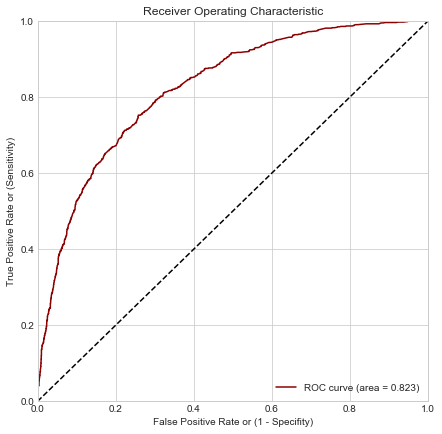

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred = model.predict(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc,color="darkred")
plt.plot([0, 1], [0, 1], 'k--',color="black") 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# LOGREG - Predictions and Evaluation

In [67]:
x_test = sm.add_constant(x_test).copy()
y_pred = model.predict(x_test)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max f:  0.3
max a:  0.5


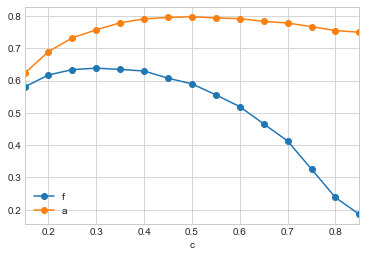

In [68]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['actual'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

In [69]:
y_pred = model.predict(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)

print('\033[1m' + '\033[4m' + 'accuracy' + '\033[0m')
print(round(np.mean(test_calc['actual']==test_calc['predicted'])*100,2),"%")
print('\n')
print('\033[1m' + '\033[4m' + 'classification_report' + '\033[0m')
print(classification_report(test_calc['actual'],test_calc['predicted']))
print('\n')
print('\033[1m' + '\033[4m' + 'confusion_matrix' + '\033[0m')
print(confusion_matrix(test_calc['actual'],test_calc['predicted']))

accuracy
79.76 %


classification_report
             precision    recall  f1-score   support

          0       0.83      0.90      0.87       964
          1       0.67      0.52      0.59       370

avg / total       0.79      0.80      0.79      1334



confusion_matrix
[[870  94]
 [176 194]]
